In [700]:
import pandas as pd

In [701]:
lol = pd.read_csv('./data/sample_SilverKDA.csv')
lol.drop(['Unnamed: 0'],axis=1,inplace=True)
lol

,gameResult,TOP,JUNGLE,MIDDLE,BOTTOM,SUPPORT
0,1,2.18,2.37,1.61,1.39,2.00
1,0,3.50,2.09,1.61,2.50,1.86
2,0,0.74,1.40,1.61,1.92,3.01
3,0,1.61,1.76,2.14,3.40,2.10
4,0,1.61,1.78,2.13,3.76,2.01
...,...,...,...,...,...,...
3485,1,1.95,3.00,2.74,3.14,2.13
3486,0,2.02,2.67,2.74,2.75,2.13
3487,0,1.39,1.88,3.08,2.45,2.13
3488,0,2.60,2.37,3.08,2.99,2.13


Text(0.5, 1.0, 'Count plot - Game Result')

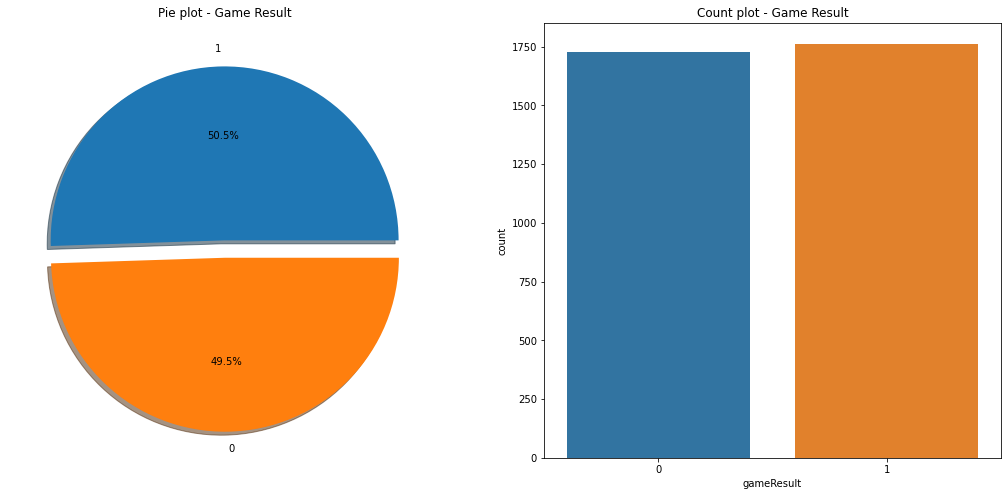

In [702]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f, ax = plt.subplots(1, 2, figsize=(18, 8))

lol['gameResult'].value_counts().plot.pie(explode= [0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Game Result')
ax[0].set_ylabel('')
sns.countplot('gameResult', data=lol, ax=ax[1])
ax[1].set_title('Count plot - Game Result')

In [703]:
pd.crosstab(lol['JUNGLE'], lol['gameResult'], margins=True)

gameResult,0,1,All
JUNGLE,,,
0.47,0,1,1
0.49,1,0,1
0.5,1,0,1
0.58,1,0,1
0.63,1,0,1
...,...,...,...
7.37,1,0,1
7.92,0,2,2
8.84,0,1,1


range(0, 50)
1419


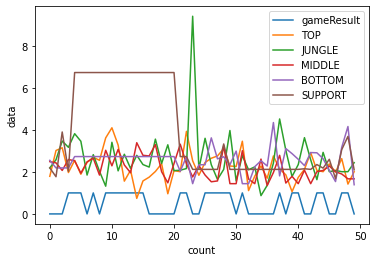

In [704]:
import numpy as np
import random
x = range(0,50)
print(x)
randInt = random.randint(0,lol['gameResult'].count()-50)
y0 = lol['gameResult'][randInt:randInt+50]
plt.plot(x, y0, label="gameResult")
y1 = lol['TOP'][randInt:randInt+50]
plt.plot(x, y1, label="TOP")
y2 = lol['JUNGLE'][randInt:randInt+50]
plt.plot(x, y2, label="JUNGLE")
y3 = lol['MIDDLE'][randInt:randInt+50]
plt.plot(x, y3, label="MIDDLE")
y4 = lol['BOTTOM'][randInt:randInt+50]
plt.plot(x, y4, label="BOTTOM")
y5 = lol['SUPPORT'][randInt:randInt+50]
plt.plot(x, y5, label="SUPPORT")
print(randInt)
plt.xlabel('count')
plt.ylabel('data')

plt.legend()

plt.show()

In [705]:
lol.head()

,gameResult,TOP,JUNGLE,MIDDLE,BOTTOM,SUPPORT
0,1,2.18,2.37,1.61,1.39,2.00
1,0,3.50,2.09,1.61,2.50,1.86
2,0,0.74,1.40,1.61,1.92,3.01
3,0,1.61,1.76,2.14,3.40,2.10
4,0,1.61,1.78,2.13,3.76,2.01


In [706]:
lol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3490 entries, 0 to 3489
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gameResult  3490 non-null   int64  
 1   TOP         3490 non-null   float64
 2   JUNGLE      3490 non-null   float64
 3   MIDDLE      3490 non-null   float64
 4   BOTTOM      3490 non-null   float64
 5   SUPPORT     3490 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 163.7 KB


In [707]:
from sklearn.model_selection import train_test_split

X = lol[['TOP','JUNGLE','MIDDLE','BOTTOM','SUPPORT']]
y = lol['gameResult']

X_train, X_test, y_train, y_test = \
                    train_test_split(X, y, test_size=0.4, random_state=13)

In [708]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth=2, random_state=13)
dt.fit(X_train, y_train)

pred = dt.predict(X_test)
print(accuracy_score(y_test, pred))

0.5315186246418339


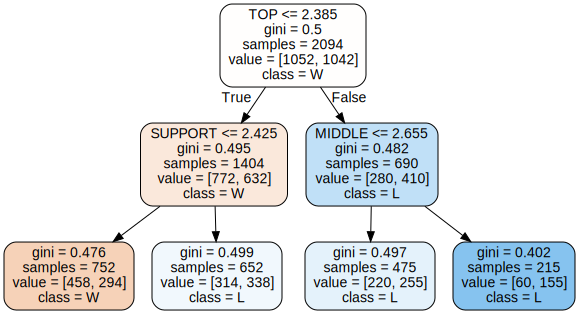

In [709]:
from graphviz import Source
from sklearn.tree import export_graphviz

Source(export_graphviz(dt, feature_names=X_train.columns, class_names=['W','L'], rounded=True, filled=True))

In [710]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=13, solver='liblinear')
lr.fit(X_train, y_train)

pred = lr.predict(X_test)
print(accuracy_score(y_test, pred))

0.5830945558739254


In [711]:
lol

,gameResult,TOP,JUNGLE,MIDDLE,BOTTOM,SUPPORT
0,1,2.18,2.37,1.61,1.39,2.00
1,0,3.50,2.09,1.61,2.50,1.86
2,0,0.74,1.40,1.61,1.92,3.01
3,0,1.61,1.76,2.14,3.40,2.10
4,0,1.61,1.78,2.13,3.76,2.01
...,...,...,...,...,...,...
3485,1,1.95,3.00,2.74,3.14,2.13
3486,0,2.02,2.67,2.74,2.75,2.13
3487,0,1.39,1.88,3.08,2.45,2.13
3488,0,2.60,2.37,3.08,2.99,2.13


In [712]:
import numpy as np
thisPic = np.array([[1.43, 1.84, 1.92, 2.50, 3.92]])
winRate = lr.predict_proba(thisPic)[0,1]
if winRate >= 0.5 and winRate <=0.6:
    print("해볼만합니다.")
elif winRate <0.5 and winRate >=0.3:
    print("팀상태보고 원하면 게임을 미리 포기하시길 바랍니다.")
elif winRate <0.3:
    print("게임을 미리 포기하길 추천드립니다.")
else:
    print("팀이 잘할 가능성이 매우 높아 보입니다.")
print('우리팀의 승률 : ',lr.predict_proba(thisPic)[0,1]*100,"%")

팀상태보고 원하면 닷지 요망
우리팀의 승률 :  39.25780112153117 %
